# Boyle Co., 2-242.00, CPT Analysis

In [1]:
import importlib
import csv
import pandas as pd
import numpy as np

In [2]:
import main
importlib.reload(main) # Reload py file to get updates in file if resaved

<module 'main' from 'c:\\Users\\clayt\\Documents\\Python Scripts\\CPTPython\\main.py'>

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Hole 1002CPT

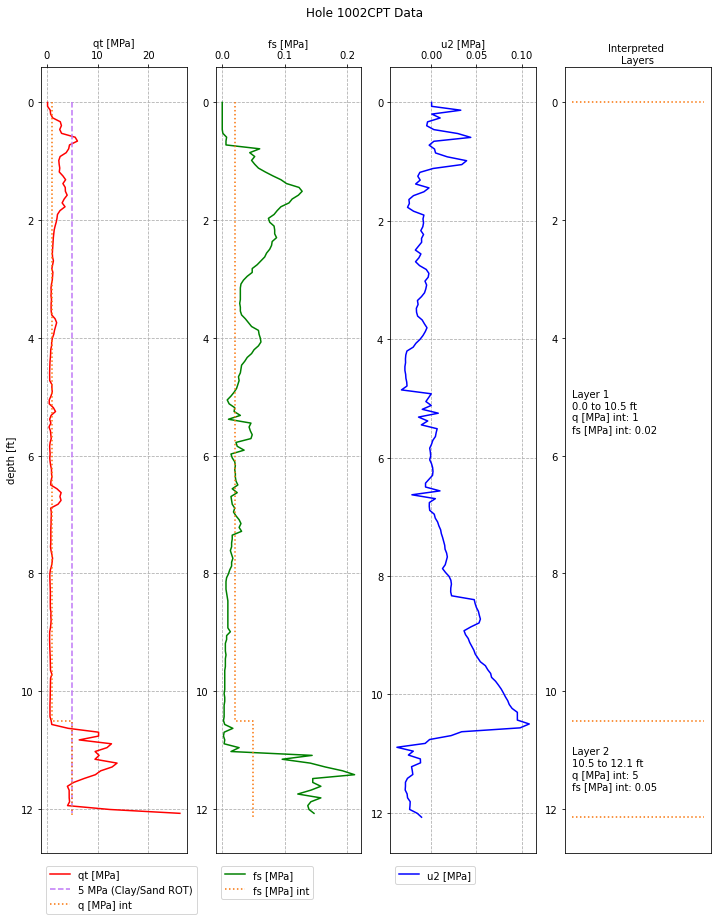

In [15]:
# Hole 1002CPT
name = "Hole 1002CPT"
with open("Boyle Co., 2-242.00\\2021-01-27 7-242.00 S-007-2021 Hole1002 CPT Test 1.csv") as f:
    data = list(csv.reader(f))
    
    header = data[0]
    data = data[1:]
    
    H = [float(x[0]) for x in data]
    qc = [float(x[1]) for x in data]
    fs = [float(x[2]) for x in data]
    u2 = [float(x[3]) for x in data]

# Calculate qt
qt = []
for i, qc_value in enumerate(qc):
    qt.append(main.corrected_cone_resistance(qc_value,u2[i]))

push_1002CPT = {'name':name,
       header[0]: H,
       header[1]: qc,
       header[2]: fs,
       header[3]: u2,
       'qt [MPa]': qt}

# Hole 1002CPT Interpreted Layers
int_1002CPT = {'layer name':   ['Layer 1','Layer 2'],
            'layers [m]':   [3.2,3.7],
            'q [MPa] int': [1,5],
            'fs [MPa] int': [0.02,0.05]
           }

main.plot_push(push_1002CPT['H [m]'],push_1002CPT['qt [MPa]'],push_1002CPT['fs [MPa]'],push_1002CPT['u2 [MPa]'],
               title = 'Hole 1002CPT Data',depth_unit='ft',
               int_dict=int_1002CPT,
               q_corrected=True)

## Hole 1003CPT

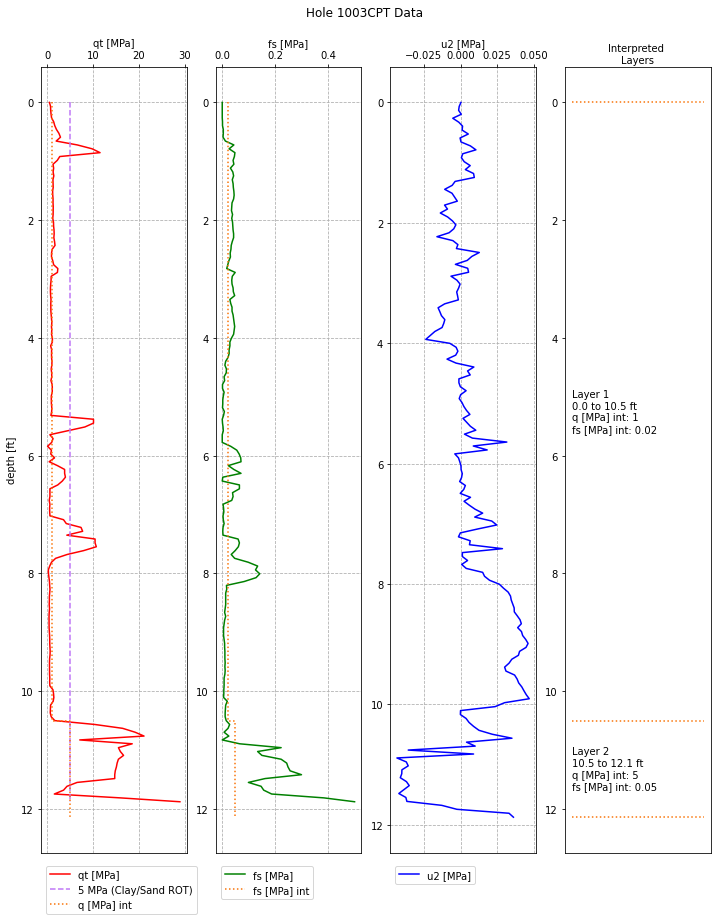

In [16]:
# Hole 1003CPT
name = "Hole 1003CPT"
with open("Boyle Co., 2-242.00\\2021-01-27 7-242.00 S-007-2021 Hole1003 CPT Test.csv") as f:
    data = list(csv.reader(f))
    
    header = data[0]
    data = data[1:]
    
    H = [float(x[0]) for x in data]
    qc = [float(x[1]) for x in data]
    fs = [float(x[2]) for x in data]
    u2 = [float(x[3]) for x in data]

# Calculate qt
qt = []
for i, qc_value in enumerate(qc):
    qt.append(main.corrected_cone_resistance(qc_value,u2[i]))

push_1003CPT = {'name':name,
       header[0]: H,
       header[1]: qc,
       header[2]: fs,
       header[3]: u2,
       'qt [MPa]': qt}

# Hole 1003CPT Interpreted Layers
int_1003CPT = {'layer name':   ['Layer 1','Layer 2'],
            'layers [m]':   [3.2,3.7],
            'q [MPa] int': [1,5],
            'fs [MPa] int': [0.02,0.05]
           }

main.plot_push(push_1003CPT['H [m]'],push_1003CPT['qt [MPa]'],push_1003CPT['fs [MPa]'],push_1003CPT['u2 [MPa]'],
               title = 'Hole 1003CPT Data',depth_unit='ft',
               int_dict=int_1003CPT,
               q_corrected=True)

# Bearing Capacity Calculation

<img src="img\Direct CPT Method for Shallow Foundations.png"
     alt="img"
     style="float: center"
     width=600/>


In [54]:
def q_max(hs, qtnet, s_B_max, L, B):
    """
    Calculates maximum bearing pressure using direct CPT method for shallow foundations.

    Parameters
    ----------
        hs (float): Foundation Soil Formation Parameter
                    based on soil type
                    Clean Sands: 0.58
                    Silts: 1.12
                    Fissued Clays: 1.47
                    Intact Clays: 2.70
        qtnet (float): the mean value of net cone tip resistance 1.5*B below the founation bearing elevation
        s_B_max (float): maximum allowable settlement ratio (s/B)max
                         Can be based on soil type
                         Clean Sands: 12%
                         Silts: 10%
                         Fissured Clays: 7%
                         Intact Clays: 4%
        L (float): Length of footing
        B (float): Width of footing
    
    Returns
    -------
        float: maximum bearing pressure
    """

    q_max = hs * qtnet * (s_B_max)**0.5 * (L/B)**-0.345

    return q_max

def settlement_cal (B, hs, q_max, qtnet, FS, L):
    """
    Calculates Settlement using direct CPT method for shallow foundations.

    Parameters
    ----------
        B (float): Width of footing
        hs (float): Foundation Soil Formation Parameter
                    based on soil type
                    Clean Sands: 0.58
                    Silts: 1.12
                    Fissued Clays: 1.47
                    Intact Clays: 2.70
        q_max (float): maximum bearing pressure calculated using direct CPT method for shallow foundations.
        qtnet (float): the mean value of net cone tip resistance 1.5*B below the founation bearing elevation
        FS (float): Factor of Safety (general 3 for geotechnical engineering)
        L (float): Length of footing

    Return
    ------
        float: estimated settlement calculation  
    """

    settlement = B * ( (1/hs) * ((q_max/FS)/qtnet) * (L/B)**0.345 )**2

    return settlement

In [115]:
# Interpreted Soil CPT Parameters for the in-situ soil
fs = 0.02 #MPa
qt = 1 #MPa  #20885.4 psf

# Intrepreted Unit Weight
int_total_unit_weight = main.soil_weight_est(fs, "MPa", weight_return_units="pcf")
print("Interpreted Unit Weight:")
print("Unit Weight: {:.2f} kN/m3".format(main.convert(int_total_unit_weight, "pcf","kN/m3")))
print("Unit Weight: {:.2f} pcf".format(int_total_unit_weight))

# Footing Geometry
B = 6 #ft
L =  6 #ft 
z = 2 #ft Depth of footing
sigma_prime_vo = z * int_total_unit_weight #psf

# Mean Value of Net Cone Resistance 1.5*B below the foundation bearing elevation
qtnet = main.convert(qt,"MPa","psf") - (z + 1.5 * B) * int_total_unit_weight

# Foundation Soil Formation Parameter
hs = 2.70 # Intact Clays
s_B_max = 0.04 # Intact Clays

# Factor of Safety
FS = 3

# Maximum allowable bearing pressure
q_max_calculated = q_max(hs, qtnet, s_B_max, L, B)
print("")
print("Calculated Ultimate Bearing Capacity: {:.0f} psf".format(q_max_calculated))
print("Calculated Allowable Bearing Capacity: {:.0f} psf".format(q_max_calculated/FS))

# Estimated Settlement
settlement_est = settlement_cal(B, hs, q_max_calculated, qtnet, FS, L)
print("")
print("Calculated Settlement: {:.2f} in.".format(settlement_est*12))

Interpreted Unit Weight:
Unit Weight: 16.35 kN/m3
Unit Weight: 105.04 pcf

Calculated Ultimate Bearing Capacity: 10654 psf
Calculated Allowable Bearing Capacity: 3551 psf

Calculated Settlement: 0.32 in.


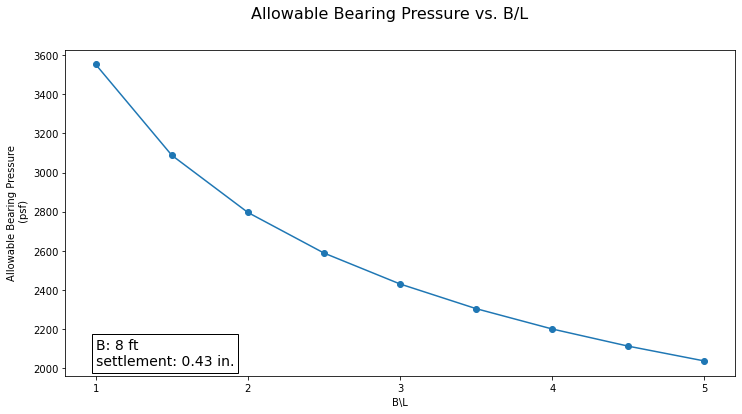

[3551.4036, 3087.795615647694, 2796.048382296585, 2588.8728893326665, 2431.0461182148433, 2305.1360106466764, 2201.3511942555187, 2113.6920470715118, 2038.240276095369]


In [117]:
# Graph of B/L for Footing Dimensions

# Footing Geometry
z = 2 #ft
B = 8 #ft
B_over_L = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Interpreted Soil CPT Parameters for the in-situ soil
fs = 0.02 #MPa
qt = 1 #MPa  #20885.4 psf
int_total_unit_weight = 105.04 #pcf

# Mean Value of Net Cone Resistance 1.5*B below the foundation bearing elevation
qtnet = main.convert(qt,"MPa","psf") - (z + 1.5 * 6) * int_total_unit_weight

# Foundation Soil Formation Parameter
hs = 2.70 # Intact Clays
s_B_max = 0.04 # Intact Clays

# Factor of Safety
FS = 3

# Calculated Lists
Ult_bearing = []
Allow_bearing = []
settlement_est = []

for B_over_L_ratio in B_over_L:
    q_max_cal = q_max(hs, qtnet, s_B_max, B_over_L_ratio, 1)
    Ult_bearing.append(q_max_cal)
    Allow_bearing.append(q_max_cal / FS)
    settlement_est.append(settlement_cal(B, hs, q_max_cal, qtnet, FS, B*B_over_L_ratio)*12)

# Plotting Allowable Bearing Pressure
fig = plt.figure(figsize=(12,6))
fig.suptitle("Allowable Bearing Pressure vs. B/L", fontsize = 16)
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1,1,1)
ax.plot(B_over_L,Allow_bearing, marker="o")
ax.set_xlabel('B\L')
ax.set_xticks([x for x in range(1,6)])
ax.set_ylabel('Allowable Bearing Pressure\n (psf)')
# Place Text
textstr= "B: {} ft\nsettlement: {:.2f} in.".format(B,settlement_est[0])
props = dict(boxstyle='square',facecolor='white')
ax.text(1,2000, textstr, verticalalignment='bottom', bbox=props, fontsize=14)
plt.show()

print(Allow_bearing)

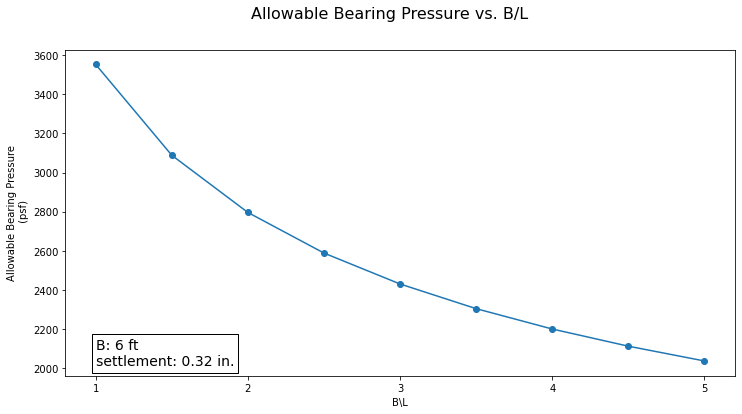

[3551.4036, 3087.795615647694, 2796.048382296585, 2588.8728893326665, 2431.0461182148433, 2305.1360106466764, 2201.3511942555187, 2113.6920470715118, 2038.240276095369]


In [109]:
# Graph of B/L for Footing Dimensions

# Footing Geometry
z = 2 #ft
B = 6 #ft
B_over_L = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Interpreted Soil CPT Parameters for the in-situ soil
fs = 0.02 #MPa
qt = 1 #MPa  #20885.4 psf
int_total_unit_weight = 105.04 #pcf

# Mean Value of Net Cone Resistance 1.5*B below the foundation bearing elevation
qtnet = main.convert(qt,"MPa","psf") - (z + 1.5 * 6) * int_total_unit_weight

# Foundation Soil Formation Parameter
hs = 2.70 # Intact Clays
s_B_max = 0.04 # Intact Clays

# Factor of Safety
FS = 3

# Calculated Lists
Ult_bearing = []
Allow_bearing = []
settlement_est = []

for B_over_L_ratio in B_over_L:
    q_max_cal = q_max(hs, qtnet, s_B_max, B_over_L_ratio, 1)
    Ult_bearing.append(q_max_cal)
    Allow_bearing.append(q_max_cal / FS)
    settlement_est.append(settlement_cal(B, hs, q_max_cal, qtnet, FS, B*B_over_L_ratio)*12)

# Plotting Allowable Bearing Pressure
fig = plt.figure(figsize=(12,6))
fig.suptitle("Allowable Bearing Pressure vs. B/L", fontsize = 16)
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1,1,1)
ax.plot(B_over_L,Allow_bearing, marker="o")
ax.set_xlabel('B\L')
ax.set_xticks([x for x in range(1,6)])
ax.set_ylabel('Allowable Bearing Pressure\n (psf)')
# Place Text
textstr= "B: {} ft\nsettlement: {:.2f} in.".format(B,settlement_est[0])
props = dict(boxstyle='square',facecolor='white')
ax.text(1,2000, textstr, verticalalignment='bottom', bbox=props, fontsize=14)
plt.show()

print(Allow_bearing)